# I-94 Traffic Indicators

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

**Data description from the [dataset website](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume):**

Abstract: Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94 (from East to West meaning from St.Paul towards Ninneapolis). Includes weather and holiday features from 2012-2018.

- **Data Set Characteristics:**  Multivariate, Sequential, Time-Series
- **Number of Instances:** 48204

**Attribute Information:**

- **holiday:** Categorical US National holidays plus regional holiday, Minnesota State Fair
- **temp:** Numeric Average temp in kelvin
- **rain_1h:** Numeric Amount in mm of rain that occurred in the hour
- **snow_1h:** Numeric Amount in mm of snow that occurred in the hour
- **clouds_all:** Numeric Percentage of cloud cover
- **weather_main:** Categorical Short textual description of the current weather
- **weather_description:** Categorical Longer textual description of the current weather
- **date_time:** DateTime Hour of the data collected in local CST time
- **traffic_volume:** Numeric Hourly I-94 ATR 301 reported westbound traffic volume

Import libraries first and prepare the Jupyter notebook to show charts

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

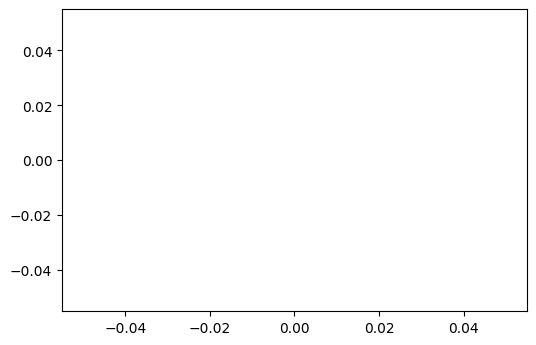

In [2]:
%matplotlib inline

plt.plot()
plt.show()

In [3]:
# code needed to run on Jupyter notebook once to plot graphs

## Import File and Initial Exploration

Open file and start exploration

In [4]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


Exploring object data to understand better values in columns

In [8]:
traffic['holiday'].value_counts(sort=True)

None                         48143
Labor Day                        7
Christmas Day                    6
New Years Day                    6
Thanksgiving Day                 6
Martin Luther King Jr Day        6
Washingtons Birthday             5
Independence Day                 5
State Fair                       5
Veterans Day                     5
Memorial Day                     5
Columbus Day                     5
Name: holiday, dtype: int64

Holidays included are National Holidays + State Fair

In [9]:
traffic['weather_main'].value_counts(normalize=True)

Clouds          0.314580
Clear           0.277799
Mist            0.123434
Rain            0.117667
Snow            0.059663
Drizzle         0.037777
Haze            0.028213
Thunderstorm    0.021451
Fog             0.018920
Smoke           0.000415
Squall          0.000083
Name: weather_main, dtype: float64

Main values are Clouds, Clear, Mist and Rain covering ~80% of data.

In [10]:
traffic['weather_description'].value_counts(normalize=True)

sky is clear                           0.241992
mist                                   0.123434
overcast clouds                        0.105406
broken clouds                          0.096797
scattered clouds                       0.071799
light rain                             0.069953
few clouds                             0.040578
light snow                             0.040370
Sky is Clear                           0.035806
moderate rain                          0.034520
haze                                   0.028213
light intensity drizzle                0.022820
fog                                    0.018920
proximity thunderstorm                 0.013961
drizzle                                0.013505
heavy snow                             0.012779
heavy intensity rain                   0.009688
snow                                   0.006078
proximity shower rain                  0.002821
thunderstorm                           0.002593
heavy intensity drizzle                0

This columns seems an expansion of the *weather_main* column. One key thing is that there is a duplicate for 'sky is clear' we would need to edit this column to have only lowercases to avoid this.

Date time is object here we will need to edit to make it a date column or a numeric one.

In [11]:
traffic['traffic_volume'].value_counts(normalize=True, bins=10)

(-7.281000000000001, 728.0]    0.167932
(4368.0, 5096.0]               0.163596
(5096.0, 5824.0]               0.116878
(728.0, 1456.0]                0.105800
(2184.0, 2912.0]               0.098851
(2912.0, 3640.0]               0.098768
(3640.0, 4368.0]               0.090221
(5824.0, 6552.0]               0.079952
(1456.0, 2184.0]               0.058813
(6552.0, 7280.0]               0.019189
Name: traffic_volume, dtype: float64

What does the negative number mean? Is the bins command not working correctly?

In [12]:
traffic['traffic_volume'].describe()
# There is a min of 0 vehicles and a max of 7280 vehicles in one hour

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

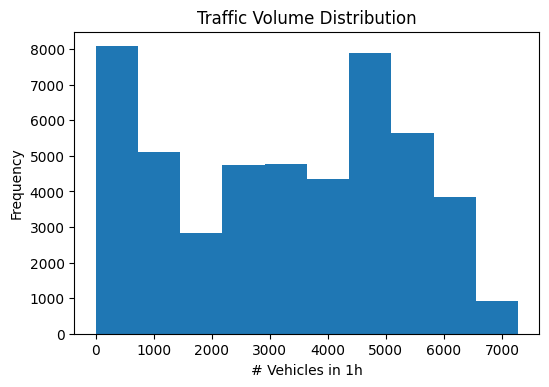

In [13]:
traffic['traffic_volume'].plot.hist()
plt.title('Traffic Volume Distribution')
plt.xlabel(('# Vehicles in 1h'))
plt.show()

## Data Cleaning

### Split Dataset Day & Night

Convert *date_time* into time stamp and then extract hour only

In [14]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['month'] = traffic['date_time'].dt.month
traffic['day_hour'] = traffic['date_time'].dt.hour
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek

Split the dataset into 2 *traffic_day* and *traffic_night*

In [15]:
traffic_day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
# traffic_day.describe()
traffic_day['date_time'].value_counts(bins=12).sort_index()

(2012-09-30 04:27:17.999999999, 2013-04-02 19:45:00]    2380
(2013-04-02 19:45:00, 2013-10-02 06:30:00]              2208
(2013-10-02 06:30:00, 2014-04-02 17:15:00]              2069
(2014-04-02 17:15:00, 2014-10-02 04:00:00]              1283
(2014-10-02 04:00:00, 2015-04-02 14:45:00]                 0
(2015-04-02 14:45:00, 2015-10-02 01:30:00]              1350
(2015-10-02 01:30:00, 2016-04-01 12:15:00]              1690
(2016-04-01 12:15:00, 2016-09-30 23:00:00]              2375
(2016-09-30 23:00:00, 2017-04-01 09:45:00]              2600
(2017-04-01 09:45:00, 2017-09-30 20:30:00]              2618
(2017-09-30 20:30:00, 2018-04-01 07:15:00]              2604
(2018-04-01 07:15:00, 2018-09-30 18:00:00]              2700
Name: date_time, dtype: int64

In [16]:
traffic_night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
# in this case we need an OR condition
# traffic_night.describe()
traffic_night['date_time'].value_counts(bins=12).sort_index()
# as we can see in this situation we have some zero as pandas try to bridge the gap between 7am and 7pm

(2012-09-30 14:27:35.999999999, 2013-04-03 05:20:00]    2368
(2013-04-03 05:20:00, 2013-10-02 15:40:00]              2265
(2013-10-02 15:40:00, 2014-04-03 02:00:00]              2092
(2014-04-03 02:00:00, 2014-10-02 12:20:00]              1306
(2014-10-02 12:20:00, 2015-04-02 22:40:00]                 0
(2015-04-02 22:40:00, 2015-10-02 09:00:00]              1407
(2015-10-02 09:00:00, 2016-04-01 19:20:00]              1766
(2016-04-01 19:20:00, 2016-10-01 05:40:00]              2456
(2016-10-01 05:40:00, 2017-04-01 16:00:00]              2650
(2017-04-01 16:00:00, 2017-10-01 02:20:00]              2722
(2017-10-01 02:20:00, 2018-04-01 12:40:00]              2609
(2018-04-01 12:40:00, 2018-09-30 23:00:00]              2686
Name: date_time, dtype: int64

### Explore Day vs Night Datasets

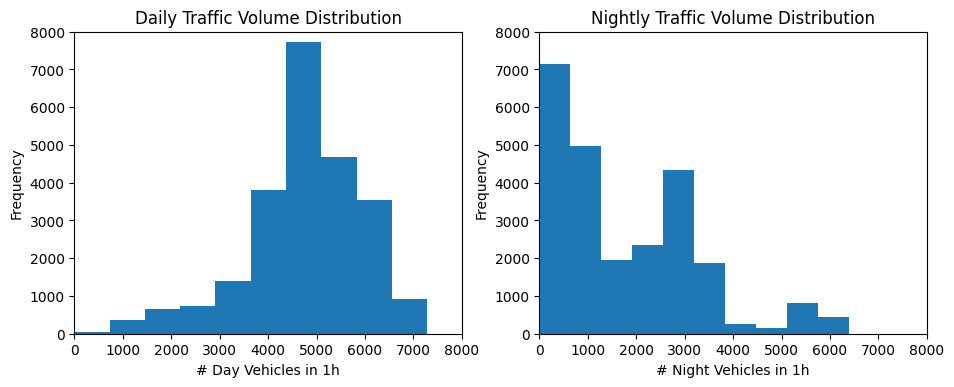

In [17]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
traffic_day['traffic_volume'].plot.hist()
plt.title('Daily Traffic Volume Distribution')
plt.xlim(0,8000)
plt.ylim([0,8000])
plt.xlabel(('# Day Vehicles in 1h'))

plt.subplot(1,2,2)
traffic_night['traffic_volume'].plot.hist()
plt.title('Nightly Traffic Volume Distribution')
plt.xlim(0,8000)
plt.ylim([0,8000])
plt.xlabel(('# Night Vehicles in 1h'))

plt.show()

Day Traffic seems distributed with some left skew but with a somewhat normal distribution.

Night Traffic is skewed to the right

In [18]:
traffic_day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_hour,dayofweek
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452,6.522218,12.431419,2.983457
std,13.298885,63.62932,0.008853,37.564588,1174.546482,3.407585,3.473405,2.007363
min,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000,4.000000,9.000000,1.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000,7.000000,12.000000,3.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000,9.000000,15.000000,5.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000,12.000000,18.000000,6.000000


In [19]:
traffic_night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_hour,dayofweek
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441,6.490155,10.384018,2.986476
std,13.296357,1.110872,0.007434,40.048382,1441.951197,3.392973,9.029227,2.004584
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000,4.000000,2.000000,1.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000,7.000000,5.000000,3.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000,9.000000,20.000000,5.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000,12.000000,23.000000,6.000000


Max traffic is still pretty high even in the night dataset, but frequency is low. Most observations are below 4000 vehicles (P75 at 2819), while for the day dataset P25 is at 4252. 
Could we approx that P90 night value is below P25 for day dataset?
Most distribution is skewed to the right.
We could drop the night dataset and focus on the day dataset to draw conclusions on 

### Day Dataset Analysis

After dropping the Night dataset from our analysis we are going to focus on the Day and look at time patterns. We are going to look into:
- Month
- Day of Week
- Time of the day

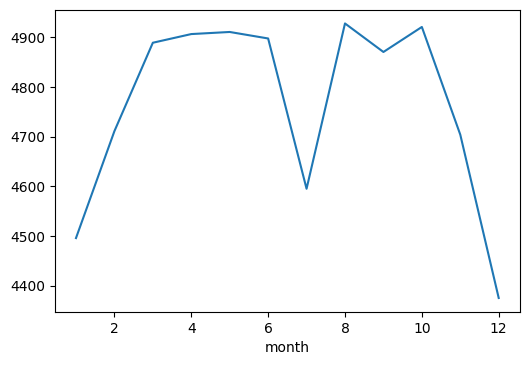

In [20]:
traffic_day_by_month = traffic_day.groupby('month').mean()
traffic_day_by_month['traffic_volume'].plot.line()

Traffic in January, July and December is the lowest lower. February and November are lower than other months.
March, April, May, June, August, September and October have the highest values

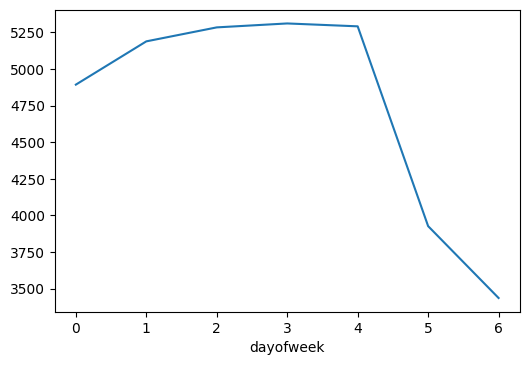

In [21]:
traffic_day_by_dayofweek = traffic_day.groupby('dayofweek').mean()
traffic_day_by_dayofweek['traffic_volume'].plot.line()

Remembering that Monday=0, Sunday=6. Traffic drops on Saturday and Sunday and peaks on Wednesday and Thursday.

### Hourly Analysis

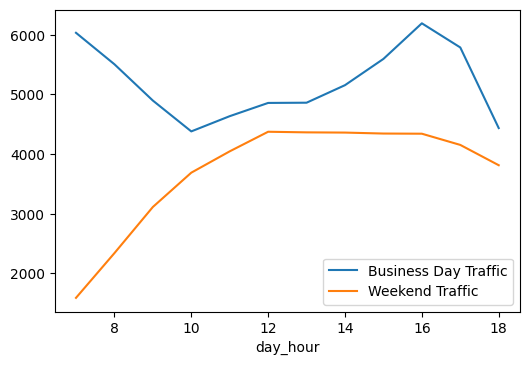

In [22]:
traffic_business_day = traffic_day.copy()[traffic_day['dayofweek'] <= 4] # 4=Friday
traffic_weekend_day = traffic_day.copy()[traffic_day['dayofweek'] >= 5] # 5=Saturday
# chek weekday/businessday traffic per hour
traffic_hour_business_day = traffic_business_day.groupby('day_hour').mean()
traffic_hour_business_day['traffic_volume'].plot.line(label='Business Day Traffic')
# chek weekend traffic per hour
traffic_hour_weekend_day = traffic_weekend_day.groupby('day_hour').mean()
traffic_hour_weekend_day['traffic_volume'].plot.line(label='Weekend Traffic')
plt.legend()

This chart is very interesting as Weekend Traffic shows a linear growth of traffic during the day until Noon, then it stays stable at ~4500 vehicles per hour until 16 and then it starts dropping below 4000.
On the other hand Business Day Traffic is somewhat specular. Linearly drops from peak at 7am to ~4500 per vehicle at 10, then steadily but linearly rises until 13 , then there is an inflexion point, sharper growth in traffic until 16pm (peak on similar values as 7am), declines a bit until 17pm and then starts declining more sharply after.

Time related summary:
- Peak months are Apr to Jun and August to October (warmer months) July is the exception, presumably holidays. January, December and February (cold months) have the lowest traffic. People commute less ?
- Traffic is more intense during the day
- Traffic is more intense during the week, with rush hours 7am and 16pm.

## Weather Indicators

### Numeric Weather Columns

In [23]:
traffic.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_hour,dayofweek
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299,0.223738,0.112089,-0.007708
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714,0.001298,0.003421,-0.006920
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733,0.020412,0.009849,-0.014928
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054,-0.009133,0.054418,-0.039715
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000,-0.002533,0.352401,-0.149544
month,0.223738,0.001298,0.020412,-0.009133,-0.002533,1.000000,0.001865,0.010741
day_hour,0.112089,0.003421,0.009849,0.054418,0.352401,0.001865,1.000000,-0.003858
dayofweek,-0.007708,-0.006920,-0.014928,-0.039715,-0.149544,0.010741,-0.003858,1.000000


Correlations between traffic_volume and weather columns is not very high. The highest is with temp (which, we need to keep in mind is in Kelvin)

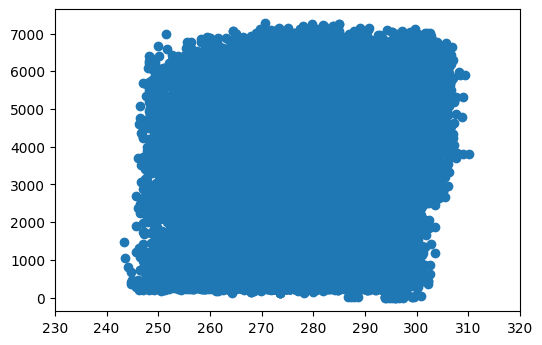

In [24]:
plt.scatter(x=traffic['temp'], y=traffic['traffic_volume'])
plt.xlim(230, 320)
plt.show()

In [25]:
traffic_day.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_hour,dayofweek
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317,0.222072,0.162691,0.000188
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697,0.001176,0.008279,-0.009683
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265,0.026768,0.003923,-0.008814
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932,0.000595,0.023685,-0.041980
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000,-0.022337,0.172704,-0.416453
month,0.222072,0.001176,0.026768,0.000595,-0.022337,1.000000,0.008145,0.013656
day_hour,0.162691,0.008279,0.003923,0.023685,0.172704,0.008145,1.000000,-0.002767
dayofweek,0.000188,-0.009683,-0.008814,-0.041980,-0.416453,0.013656,-0.002767,1.000000


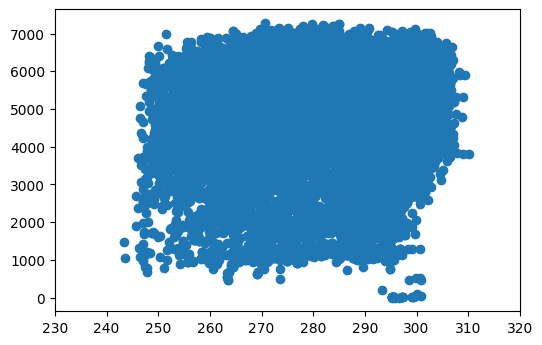

In [26]:
plt.scatter(x=traffic_day['temp'], y=traffic_day['traffic_volume'])
plt.xlim(230, 320)
plt.show()

Distribution seems homogeneous whether we look at the whole dataset or the daytime only

### Categorical Weather Columns

Check average traffic during the day by weather description

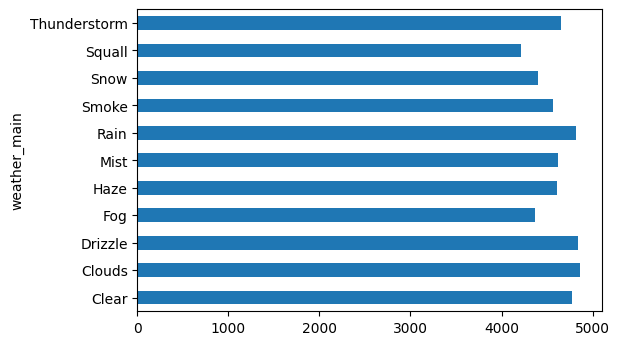

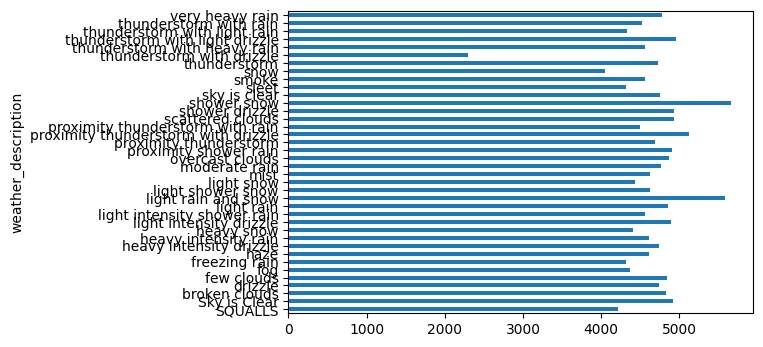

In [28]:
traffic_weather_day_main = traffic_day.groupby('weather_main').mean()

traffic_weather_day_main['traffic_volume'].plot.barh()
plt.show()

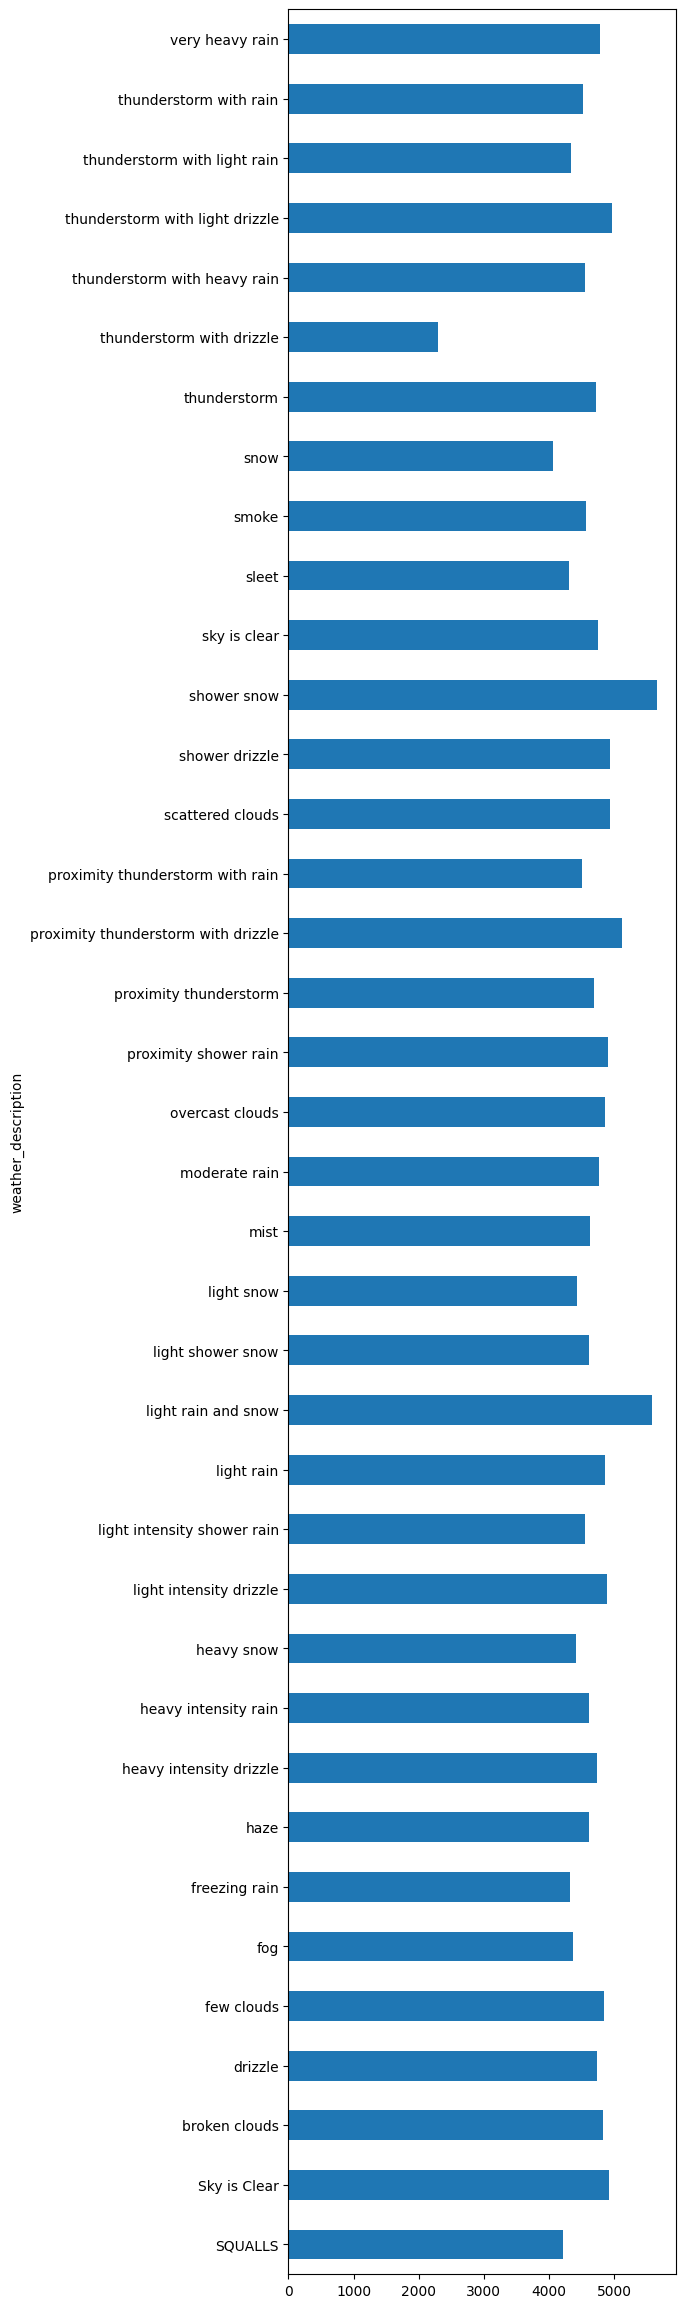

In [34]:
traffic_weather_day_description = traffic_day.groupby('weather_description').mean()

traffic_weather_day_description['traffic_volume'].plot.barh(figsize=(5,30))
plt.show()

No weather main is associated with more than 5,000 cars.
The only weather description with significantly different traffic seems thunderstorm with drizzle.
In weather description we have above 5,000:
- light rain and snow
- shower snow
- proximity thunderstorm with drizzle

Is it because when weather is getting worse (bad but not too bad) people rush out to avoid the really bad waether (like thunderstorm with drizzle)?

# Conclusion

In this project, we looked for indicators of heavy traffic on the I-94 Interstate highway. We can categorize these indicators in 2 types:

Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier during the day
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are ~ 7 and 16.

Weather indicators (+)
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle